### Business Problem :  Sales Prediction for Big Mart Outlets

   The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 
   The aim is to build a predictive model and predict the sales of each product at a particular outlet.
   Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [3]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Loading datasets

In [4]:
data = pd.read_csv('train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
## Basic Statistical analysis

data.shape   ## our dataset contains 8523 rows and 12 columns 

(8523, 12)

In [6]:
data.describe()  

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
## Finding no.of null values in each variable
data.isnull().sum()  ## we can see Item_Weight & Outlet_Size are only having null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Checking uniques values in each feature

data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Preprocessing of dataset

In [10]:
cat_col = []
num_col = []
for x in data.dtypes.index:
    if data.dtypes[x]== 'object':
        cat_col.append(x)
    else:
        num_col.append(x)

In [11]:
cat_col ## Here Item_Identifier and Outlet_Identifier are not much useful for our prediction

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [13]:
## Dropping Item_Identifier and Outlet_Identifier variables

cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [14]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
## print the contains in each categorical column

for i in cat_col:
    print(i, '\n', data[i].value_counts())

Item_Fat_Content 
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size 
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type 
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type 
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype

##### We can see that in 
Item_Fat_Content same fat types is repeated with different names so we can combine all under one type
because they are having same features but categorized with different names.



In [16]:
## Handling missing values

mean_item_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
mean_item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [18]:
missing_item = data['Item_Weight'].isnull()


In [19]:
for i, item in enumerate(data['Item_Weight']):
    if missing_item[i]:
        if item in mean_item_weight:
            data['Item_Weight'][i] = missing_item.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])
    

In [20]:
data['Item_Weight'].isnull().sum()

0

In [21]:
outlet_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc =(lambda x: x.mode()))
outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [22]:
outlet_miss = data['Outlet_Size'].isnull()
data.loc[outlet_miss, 'Outlet_Size'] = data.loc[outlet_miss, 'Outlet_Type'].apply(lambda x: outlet_mode[x])

In [23]:
data.Outlet_Type.isnull().sum()

0

In [24]:
sum(data['Item_Visibility']==0)

526

In [25]:
##  Replacing Zeros with its mean

data.loc[:,'Item_Visibility'].replace([0],[data.Item_Visibility.mean()], inplace = True)
sum(data.Item_Visibility == 0)

0

In [26]:
## Combining same types of fat under one type

data.Item_Fat_Content = data.Item_Fat_Content.replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Creating New Features

In [27]:
data['NewItemType'] = data['Item_Identifier'].apply(lambda x: x[:2])
data.NewItemType.value_counts()

FD    6125
NC    1599
DR     799
Name: NewItemType, dtype: int64

In [28]:
data.NewItemType = data.NewItemType.map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [29]:
data.NewItemType.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: NewItemType, dtype: int64

In [30]:
data.loc[data['NewItemType'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [31]:
## Changing Establishment year with respect to the data collected

data['Outlet_Years'] = 2013 - data.Outlet_Establishment_Year

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

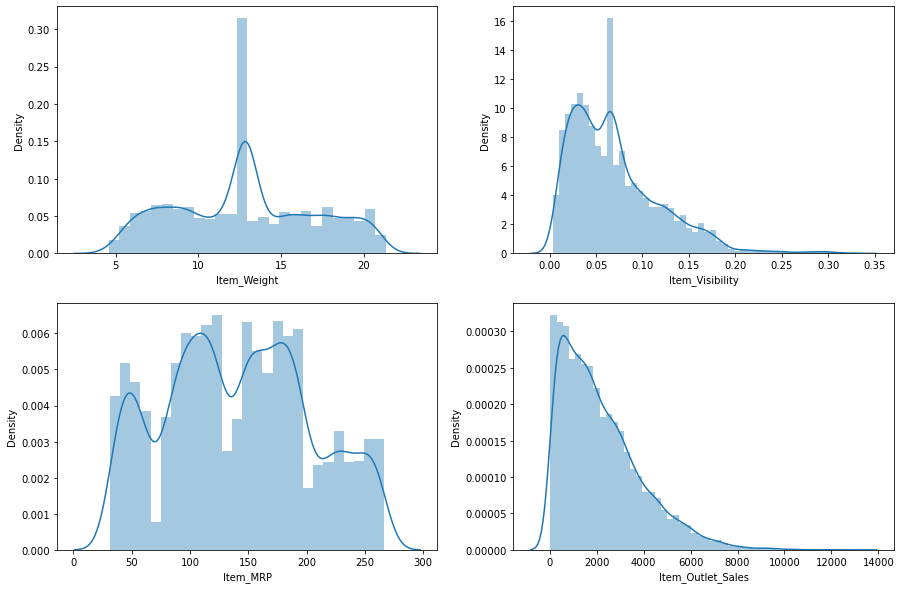

In [33]:
### Exploratory Data Analysis

fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)

sns.distplot(data.Item_Weight,kde = True, ax=ax[0][0])
sns.distplot(data.Item_Visibility,kde = True, ax=ax[0][1])
sns.distplot(data.Item_MRP, kde = True, ax=ax[1][0])
sns.distplot(data.Item_Outlet_Sales,kde= True, ax=ax[1][1])


### Inferences from above plots 
1. In Item_Weight since we have placed null values with its mean so we can see the high spike at the mean
2. Item_Visibility is slightly skewed towards the right.Here we tried to avoid visibility to zero and replaced all zero values with its mean. So almost all the are near to its mean with low variance.
3. Item_MRP prices of the products varies from 30 to 270. Here we can also the variations in the price.
4. Item_Outlet_Sales is having high spike from 0 to around 1000 and highly right skewed as the price is increasing. So to avoid this impact on our model we are normalizing this feature.

In [34]:
data['Item_Outlet_Sales'] = np.log(data.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

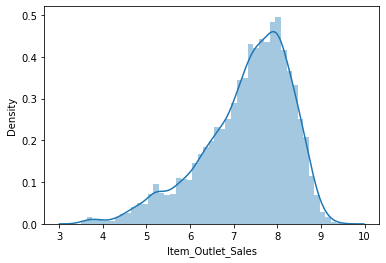

In [35]:
sns.distplot(data.Item_Outlet_Sales)  ## Now we can see that the data is somewhat as normal distributed

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

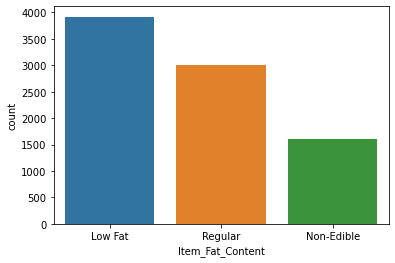

In [36]:
## Visualizing Categorical variables

sns.countplot(data.Item_Fat_Content)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

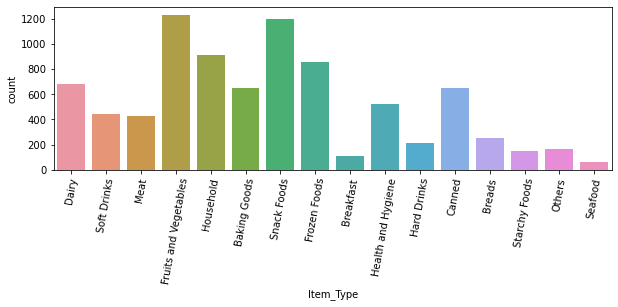

In [37]:
plt.subplots(figsize =(10,3))
l = list(data.Item_Type.unique())
graph = sns.countplot(data.Item_Type)
graph.set_xticklabels(labels=l, rotation = 80, fontsize =10)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

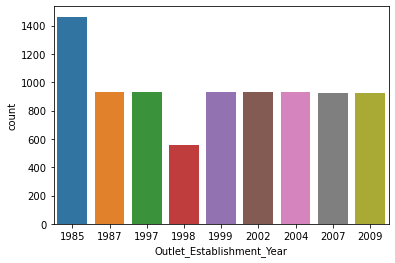

In [38]:
sns.countplot(data.Outlet_Establishment_Year)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

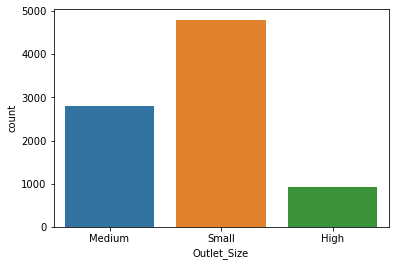

In [39]:
sns.countplot(data.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

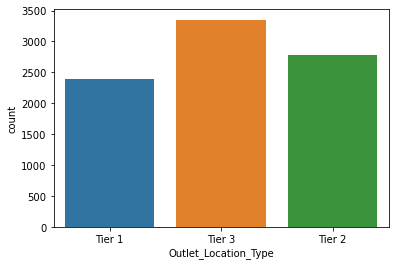

In [40]:
sns.countplot(data.Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

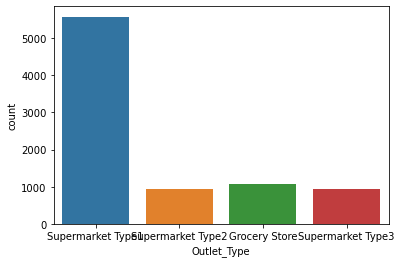

In [41]:
sns.countplot(data.Outlet_Type)

### Inferences from categorical data
1. Low fat content is higher, Regular is moderate and Non-edible is low. From this we can say that most of the products are low fat content and nealy 1500 items are high fat content
2. From Item_Type, we can see that most of the foods types are Fruits & Vegetables and Snacks
3. Most of the stores where established in the year 1985, less stores in year 1998 and remaining yrs are constant.
4. Most are outlet_size is small and High outlet size are only few.
5. There is not much differences between the Store Locations ie, Outlet_Location_Type
6. SupermarketType 1 is highly biased compared to remaining 3 types of supermarkets


#### Correlation matrix

<AxesSubplot:>

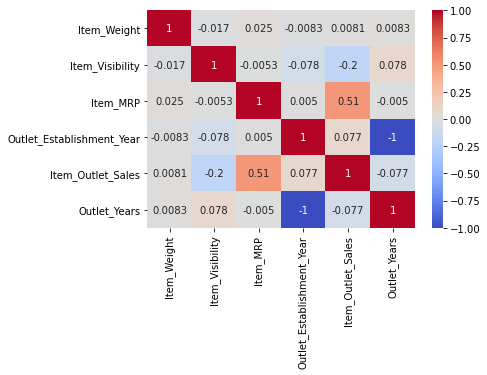

In [42]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

###### 
Item_MRP is having high contribution towards the prediction of sales and no other variables are having much contribution towards our prediction

### Encoding categorical data into numerical data


In [43]:
data1 = data.copy()

In [44]:
data1.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Item_Type'] = le.fit_transform(data1.Item_Type)


In [46]:
## One hot encoding

data1 = pd.get_dummies(data1, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','NewItemType'])

In [47]:
### Splitting the data

x = data1.drop(columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = data1.Item_Outlet_Sales

## Model Training

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    model.fit(x,y)
    
    # predict the training set
    pred = model.predict(x)        
    # perform cross_validation
    cv_score = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = 3)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('RMSE:', np.sqrt(mean_squared_error(y,pred)))
    print('Cross Validation Score:', cv_score)
    

Model Report
RMSE: 0.5381014310911603
Cross Validation Score: 0.29089022039123175


<AxesSubplot:title={'center':'Model Coefficients'}>

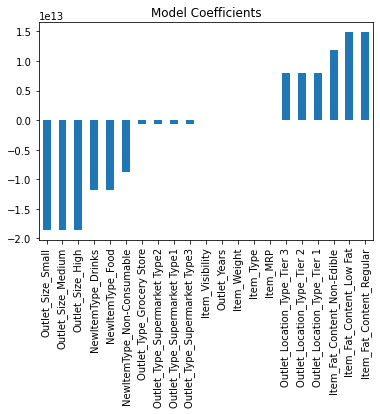

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize = True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

## Here we got good better model with Low mean square errors

Model Report
RMSE: 0.6599103929700691
Cross Validation Score: 0.43659010489966504


<AxesSubplot:title={'center':'Model Coefficients'}>

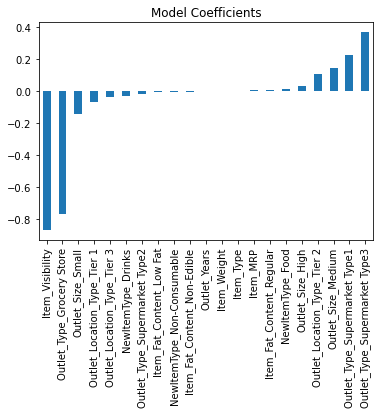

In [64]:
model =Ridge(normalize = True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

## Here RMSE somewhat increase than Linear Regression

Model Report
RMSE: 0.8751845356851512
Cross Validation Score: 0.766263048952405


<AxesSubplot:title={'center':'Model Coefficients'}>

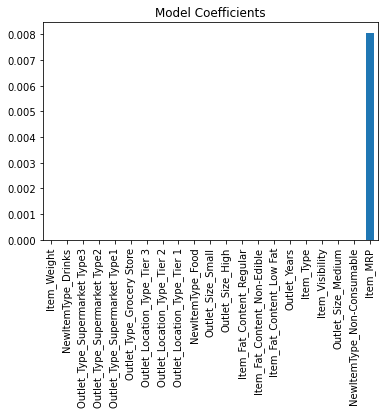

In [65]:
model = Lasso()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

## Lasso predicted using only the significant coefficient ie Item_MRP

Model Report
RMSE: 1.6663437616317167e-17
Cross Validation Score: 0.5866042104378998


<AxesSubplot:title={'center':'Feature Importance'}>

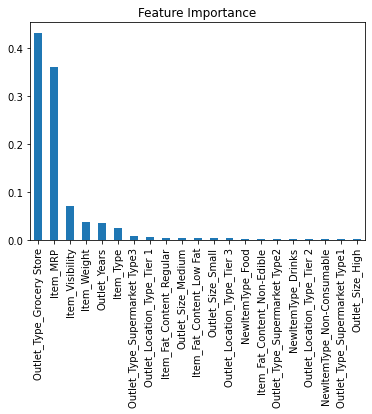

In [66]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

## Here we got best RMSE compared to above algorithms

Model Report
RMSE: 0.20710805242087685
Cross Validation Score: 0.3123814585985986


<AxesSubplot:title={'center':'Feature Importance'}>

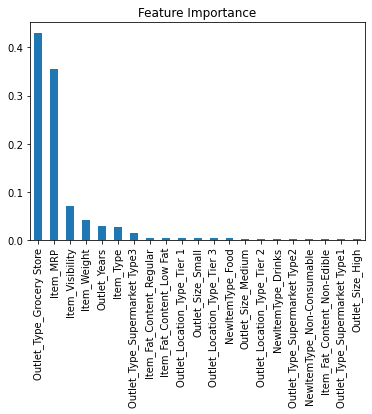

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

## We got better model here also

Model Report
RMSE: 1.0117054660776722e-14
Cross Validation Score: 0.3347623995983147


<AxesSubplot:title={'center':'Feature Importance'}>

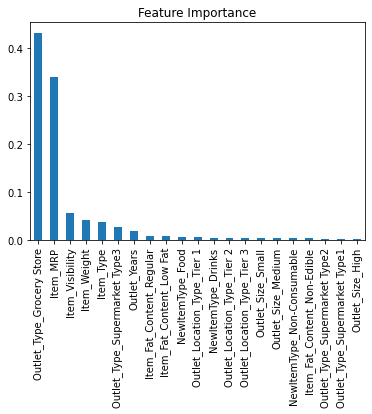

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

## the model result is similar to Decision Trees output

In [1]:
#from catboost import CatBoostRegressor
#model = CatBoostRegressor(learning_rate = 1)
#train(model, x, y)
#coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
#coef.plot(kind = 'bar', title = 'Feature Importance')

## we got better model

Model Report
RMSE: 0.22555452391744488
Cross Validation Score: 0.45037031037816155


<AxesSubplot:title={'center':'Feature Importance'}>

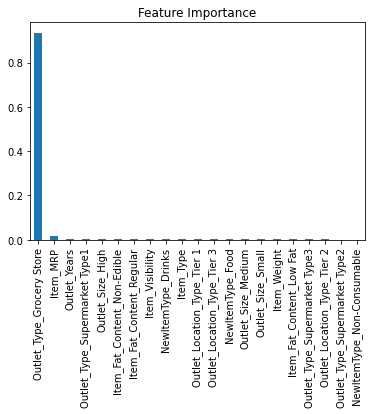

In [70]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate = 1)
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')



#### To compare the models we need to consider not only RMSE but also Cross validation score 
We need the model with RMSE and Cross validation scores nearly equal.